In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

## Goal
- The aim of this kernel is to unfold a classification modelling with focus on the process, not on the data or on the learning algorithms (this is a kernel for pipeline studying). So we use an easy dataset with few all-numerical features that gives a problem of binary classification, consisting of only 2 target classes. This dataset is called Pima indians diabetes database and uses 8 measures taken from Pima indians in order to predict their onset of diabetes.

In [3]:
# Read the data

df0 = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df0.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# We have 8 features and the target variable for 768 observations

df0.shape

(768, 9)

In [5]:
# Statistical summary

df0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Looking at the max row is scary, compare it to the mean
- We have no minors among the observations and they are mostly adults
- The target is kind of asymmetrical, with 35% of observations of class 1
- Insulin has a wild variation
- Oddly, we see that some features that aren't ever supposed to be zero (unless some of them are dead) have at least a zero observation

In [6]:
# Classes distribution

df0.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

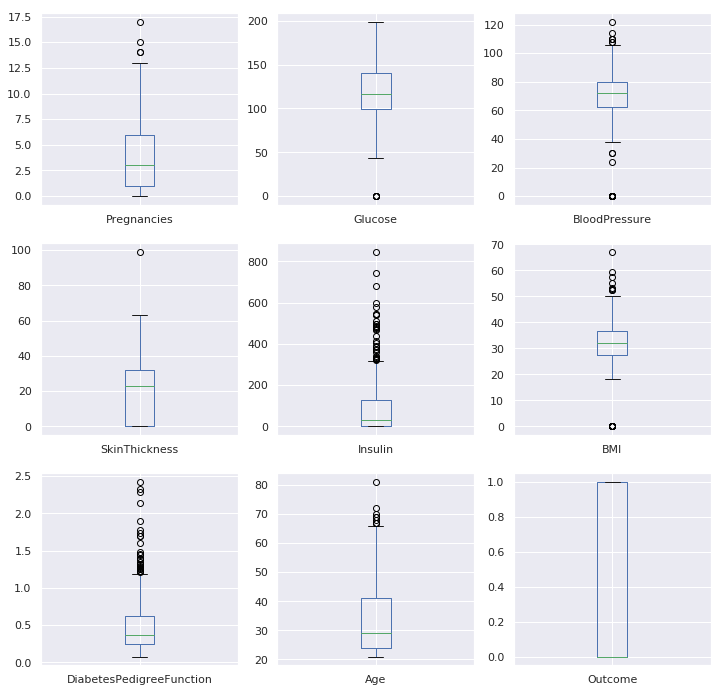

In [10]:
# Generate boxplots of features

df0.plot(kind='box', subplots=True, layout=(int(np.sqrt(df0.shape[1])),int(np.sqrt(df0.shape[1]))), 
        figsize=(12,12))

- We see many outliers (not that the observation in itself is an outlier, but with outlier behaviors in features)
- We note that those zero observations are outliers and are many, it seems that missing data might be coded as zero, let's test that later

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ba69a7ac8>,
      dtype=object)

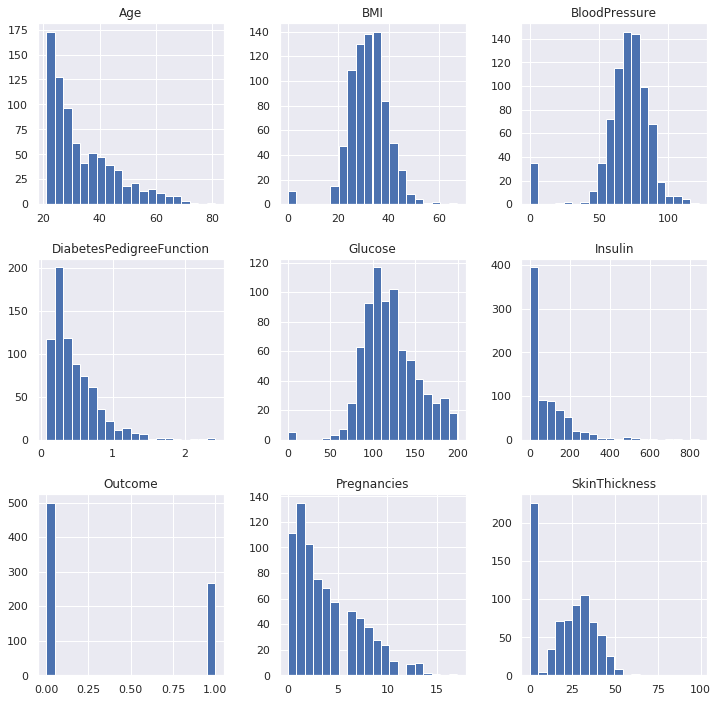

In [11]:
# Generate histograms of features

df0.hist(figsize=(12,12), bins=20)

- We can visualize the difference in size between the classes outcomes
- Skin thickness appears to be a bad feature (the zeros)
- Mostly, we have a better visualization of previous notes, especially the number of strange zeros

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


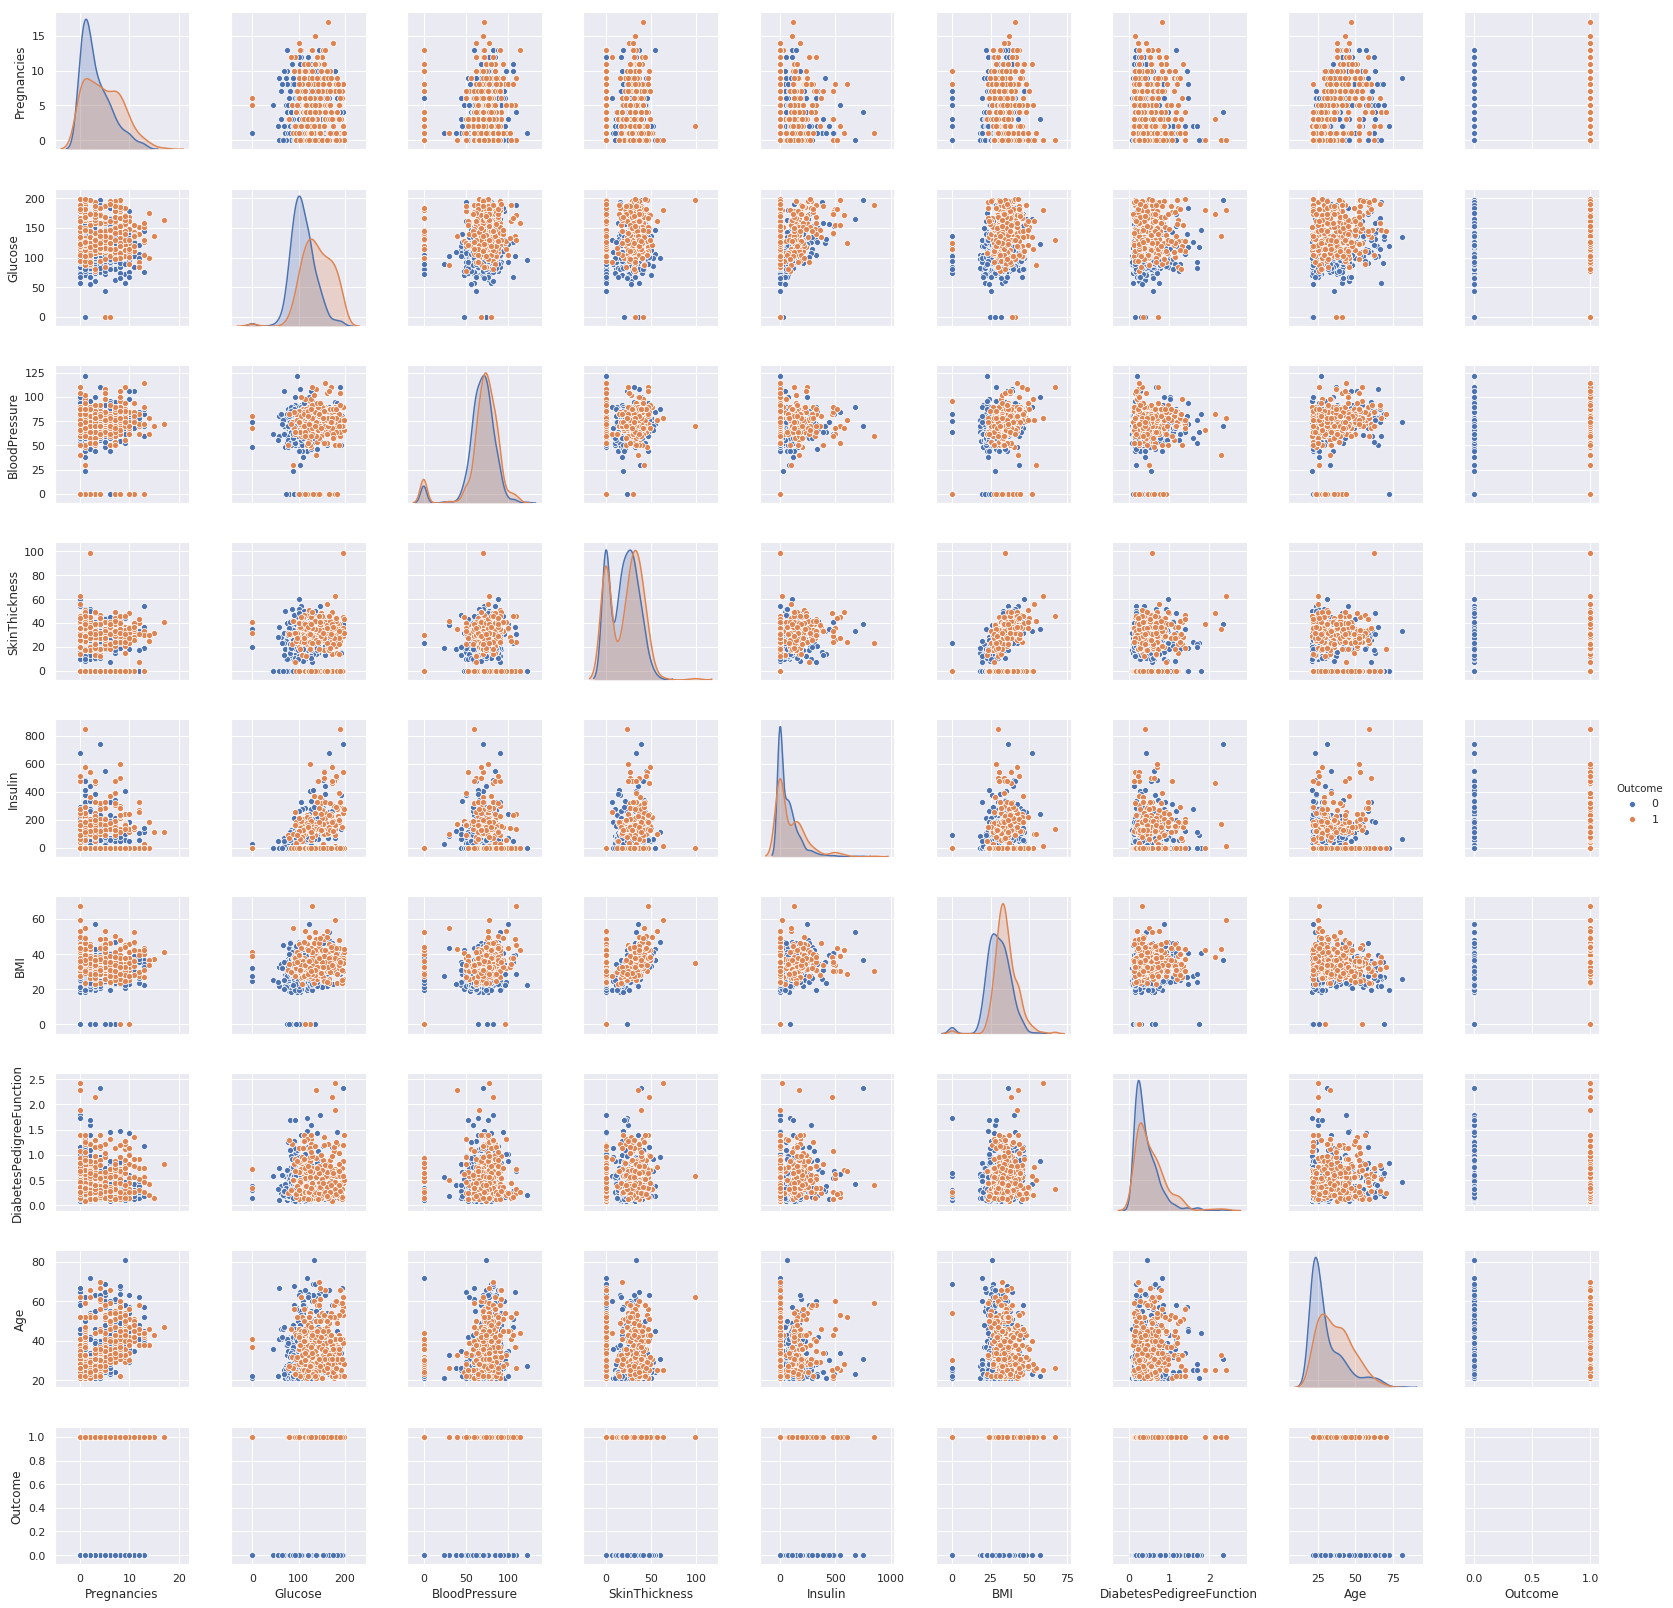

In [54]:
# Generate scatter matrix

seaborn.pairplot(df0, hue='Outcome')
plt.show()

- Here, it's interesting to observe the colinearity between features (1) and the dependency between features and the outcome (2)
- (1) We notice a bigger colinearity between BMI and skin thickness (apart from the strange zeros), between age and pregnancy, and some colinearity between insulin and glucose 
- (2) It seems pretty messy, no obvious indications. This implies that the outcome results from a more complex combination of features

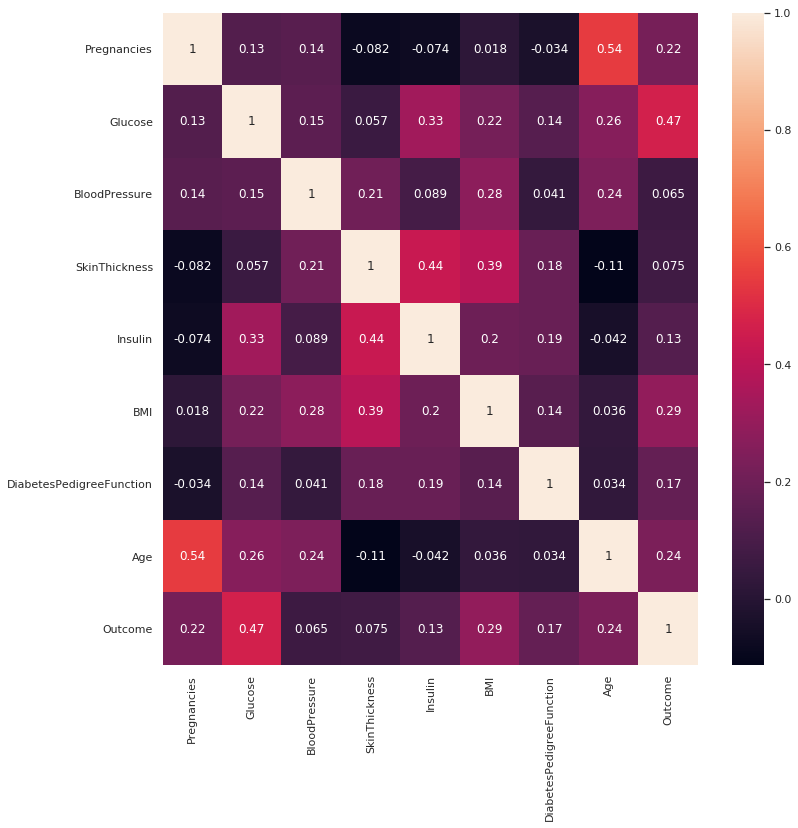

In [62]:
# Let's see the correlations numerically

plt.figure(figsize=(12, 12))
seaborn.heatmap(df0.corr(), annot=True)

In [13]:
# Before training, let's standardize our features

df = df0.copy()
df.iloc[:,:-1] = (df.iloc[:,:-1] - df.iloc[:,:-1].mean())/df.iloc[:,:-1].std()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1


In [14]:
# Prepare the training variable

X = df.iloc[:,:-1].values
X[:5], X.shape

(array([[ 0.63953049,  0.84777132,  0.1495433 ,  0.90667906, -0.69243932,
          0.20387991,  0.46818687,  1.42506672],
        [-0.84433482, -1.12266474, -0.16044119,  0.53055581, -0.69243932,
         -0.68397621, -0.36482303, -0.19054773],
        [ 1.23307662,  1.94245802, -0.26376935, -1.28737326, -0.69243932,
         -1.10253696,  0.6040037 , -0.10551539],
        [-0.84433482, -0.99755769, -0.16044119,  0.15443255,  0.12322134,
         -0.49372133, -0.92016296, -1.04087112],
        [-1.14110788,  0.50372693, -1.50370731,  0.90667906,  0.76533719,
          1.4088275 ,  5.48133703, -0.02048305]]), (768, 8))

In [15]:
# Prepare the target variable

y = df.iloc[:,-1].values
y[:5], y.shape

(array([1, 0, 1, 0, 1]), (768,))

In [16]:
# Simple train_test split

from sklearn.model_selection import train_test_split, KFold, cross_val_score

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

In [17]:
# We now choose 5 candidate models for simple model selection
# Our aim is binary classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = []

models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))

In [18]:
# Let's evaluate the candidates

results = []
model_names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=3)
    cv = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv)
    model_names.append(name)
    print(name, cv.mean(), cv.std())

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

RF 0.7361977789529349 0.026653574662106102
KNN 0.7395293495505023 0.038310032620415865
LR 0.7849550502379693 0.04395945374674626
SVM 0.7574034902168165 0.04099524748956075
NB 0.7655208884188259 0.04630365301809754


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


([<matplotlib.axis.XTick at 0x7f6ba5e48ba8>,
 <a list of 5 Text xticklabel objects>)

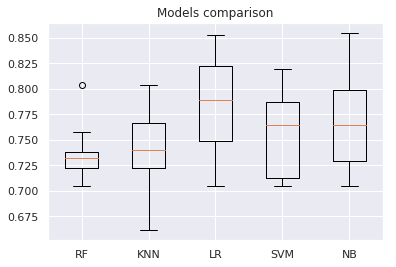

In [19]:
# Generate visual comparison

plt.boxplot(results)
plt.title('Models comparison')
plt.xticks(1+np.arange(5), model_names)

- From now on, we go with our logistic regression model. Let's remove skin thickness and impute those zeros to see if our accuracy increases

In [20]:
# New df, let's first drop the bad feature

df2 = df0.copy()
df2 = df2.drop(['SkinThickness'], axis=1)
df2.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [21]:
# Retrain the model without SkinThickness

df2.iloc[:,:-1] = (df2.iloc[:,:-1] - df2.iloc[:,:-1].mean())/df2.iloc[:,:-1].std()
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

name = 'LR'
model = LogisticRegression()
kfold = KFold(n_splits=10, random_state=3)
cv = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
print(name, cv.mean(), cv.std())

LR 0.7833421470121629 0.04283075761885671


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

- That didn't go well... Ok... Let's try imputing the zeros instead

In [22]:
# Check zeros in columns that don't make sense to have them, replace them with NaNs

impute_names = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']
df2 = df0.copy()
df2[impute_names] = df2[impute_names].replace(0, np.NaN)
df2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
# Impute with the mean

df2.fillna(df2.mean(), inplace=True)
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
# Retrain the model with imputed mean

df2.iloc[:,:-1] = (df2.iloc[:,:-1] - df2.iloc[:,:-1].mean())/df2.iloc[:,:-1].std()
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

name = 'LR'
model = LogisticRegression()
kfold = KFold(n_splits=10, random_state=3)
cv = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
print(name, cv.mean(), cv.std())

LR 0.7800898995240613 0.05141718407934965


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

- Hmm... perhaps those zeros were helping.. Let's try another imputation

In [25]:
# Impute by bfill/ffill

df2 = df0.copy()
df2[impute_names] = df2[impute_names].replace(0, np.NaN)
df2.fillna(method='bfill', inplace=True)
df2.fillna(method='ffill', inplace=True)
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
df2.iloc[:,:-1] = (df2.iloc[:,:-1] - df2.iloc[:,:-1].mean())/df2.iloc[:,:-1].std()
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

name = 'LR'
model = LogisticRegression()
kfold = KFold(n_splits=10, random_state=3)
cv = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
print(name, cv.mean(), cv.std())

LR 0.7816763617133792 0.05402053882753099


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

- Ok, the zeros are helping more than the imputations, what about doing nothing?
- But then, why? Well, the zeros are a kind of imputation already, and that gives us an insight... maybe, for datasets with missing data coming as NaNs, we should give more chance to imputation with zeros!
- Here, it is meaning that 0 is a better neutral value for those columns on average than the column's means or even non-constant values given by ffill/bfill... that's because different values' regions have different weights in determining target classes

In [45]:
# Back to our best model so far

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

name = 'LR'
model = LogisticRegression()
kfold = KFold(n_splits=10, random_state=3)
cv = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
print(name, cv.mean(), cv.std())

LR 0.7849550502379693 0.04395945374674626


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [49]:
# Now we enchance the logistic regression with a hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Logistic regression parameters:
Cs = [0.01, 0.1, 1, 5, 10, 20]
solvers = ['lbfgs', 'liblinear', 'sag', 'saga']
max_iters = [100, 200, 300]

param_grid = dict(C=Cs, solver=solvers, max_iter=max_iters)
kfold = KFold(n_splits=10, random_state=3)
model = LogisticRegression()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid.fit(Xtrain,ytrain)
print(grid.best_score_, grid.best_estimator_)

0.7850162866449512 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


- I guess the model already was well tuned...

In [50]:
# This is the model we end up with

name = 'LR'
model = grid.best_estimator_
kfold = KFold(n_splits=10, random_state=3)
cv = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
print(name, cv.mean(), cv.std())

LR 0.7849550502379693 0.04395945374674626


- We now evaluate our model using the test set
- But just now I remembered, we can't use that separated test set, because we standardized our data using it. There is a minor leakage going on, we used information contained in the test set to modify our training set.
- We will have to start over... But let's use this opportunity to build a sklearn pipeline

In [76]:
# Pipeline for testing

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df0.iloc[:,:-1].values
y = df0.iloc[:,-1].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

pipeline = []
pipeline.append(('standardize', StandardScaler()))
pipeline.append(('BestLR', model))
model_pipeline = Pipeline(pipeline)

model_pipeline.fit(Xtrain,ytrain)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('BestLR',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [72]:
# Here is our final score

model_pipeline.score(Xtest,ytest)

0.7337662337662337

In [77]:
model_pipeline.score(Xtrain,ytrain)

0.7882736156351792

In [78]:
# Let's try our score without scaling

X = df0.iloc[:,:-1].values
y = df0.iloc[:,-1].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

noscale_model = LogisticRegression()
noscale_model.fit(Xtrain,ytrain)
noscale_model.score(Xtest,ytest)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7337662337662337

In [79]:
noscale_model.score(Xtrain,ytrain)

0.7882736156351792

- It's the same... is the pipeline messing things somehow?

In [80]:
# Test with no pipeline

X = df0.iloc[:,:-1].values
y = df0.iloc[:,-1].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

sc = StandardScaler()
sc.fit_transform(Xtrain)
sc.transform(Xtest)

final_model = LogisticRegression()
final_model.fit(Xtrain,ytrain)
final_model.score(Xtest,ytest)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7337662337662337

In [81]:
final_model.score(Xtrain,ytrain)

0.7882736156351792

- No... ok, well, before I tried from the beginning without scaling and it was worse there, here it doesn't change anything, so if the model is anyhow sensible to it, it's a very specific sensibility